In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)



In [2]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):

    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.1, 200.0)
    epsilon = trial.suggest_float('epsilon', 0.001, 0.5)

    model = SVR(kernel=kernel, C=C, epsilon=epsilon)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize') 
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 11000 or best_mse <= improvement_threshold:  
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)

[I 2023-11-23 21:48:59,989] A new study created in memory with name: no-name-d45df64b-3bf9-477e-8659-ff3ac1cef6fe
[I 2023-11-23 21:49:00,620] Trial 0 finished with value: 153.96782231374016 and parameters: {'kernel': 'poly', 'C': 122.93496821064365, 'epsilon': 0.29197060694169225}. Best is trial 0 with value: 153.96782231374016.
[I 2023-11-23 21:49:01,055] Trial 1 finished with value: 288183581.1316025 and parameters: {'kernel': 'sigmoid', 'C': 197.6399200064261, 'epsilon': 0.35783210238365354}. Best is trial 0 with value: 153.96782231374016.
[I 2023-11-23 21:49:01,467] Trial 2 finished with value: 1437617.1195464798 and parameters: {'kernel': 'sigmoid', 'C': 13.903062872089704, 'epsilon': 0.3879058072699893}. Best is trial 0 with value: 153.96782231374016.


Średni błąd kwadratowy (MSE): 118.57898752523484
Procentowa zgodność: 31.22%


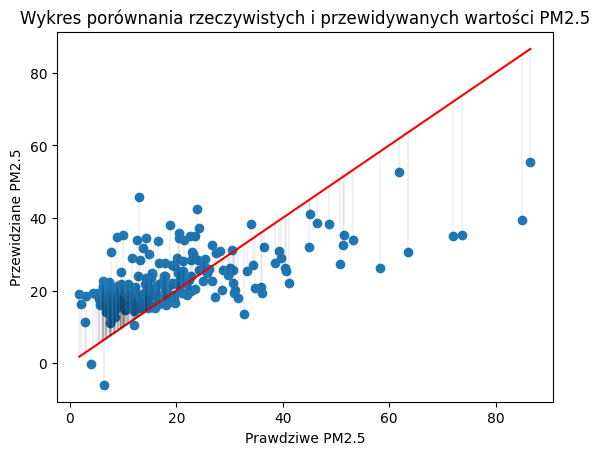

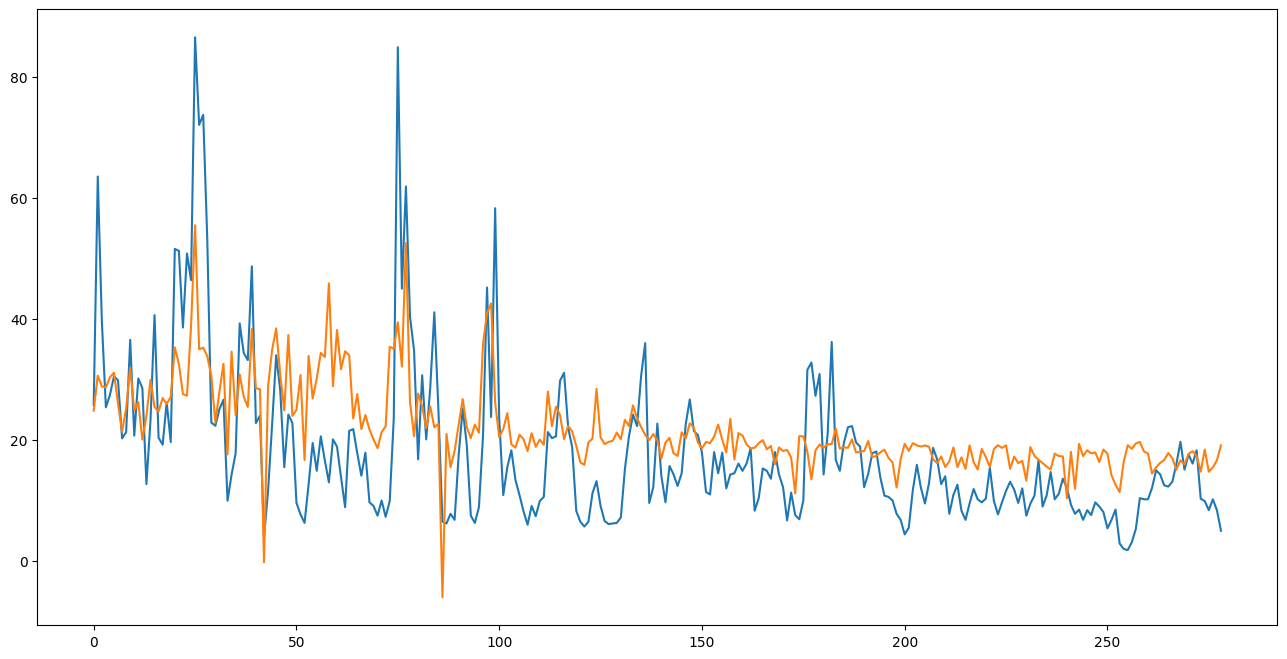

In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


kernel= 'poly'
C = 0.10281246733997491
epsilon = 0.3252193458463996



model = SVR(kernel=kernel, C=C, epsilon=epsilon)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]],'k--', lw=0.1)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = abs(results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)'])
results.sort_values('Różnica')

plt.figure(figsize=[16,8])
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

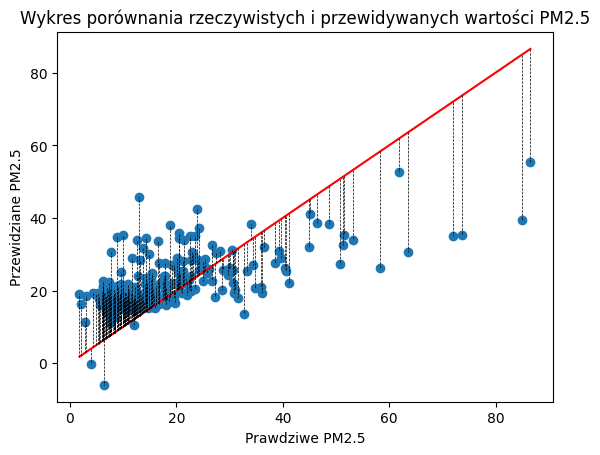

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,25.76,24.837407,0.922593
1,63.53,30.628684,32.901316
2,39.74,28.871882,10.868118
3,25.39,28.696202,-3.306202
4,27.45,30.361349,-2.911349
...,...,...,...
274,9.90,18.426807,-8.526807
275,8.40,14.762165,-6.362165
276,10.20,15.455314,-5.255314
277,8.40,16.651600,-8.251600


In [4]:
y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results